In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from collections import Counter as count
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler


In [143]:
df = pd.read_csv('/Churn_Modelling.csv')

univariate

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


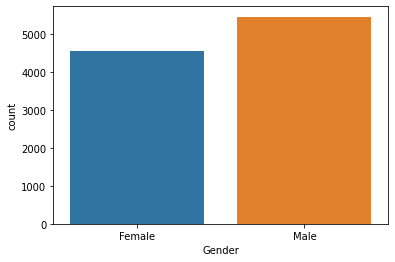

In [144]:
sns.countplot(df['Gender'])

Bivariate

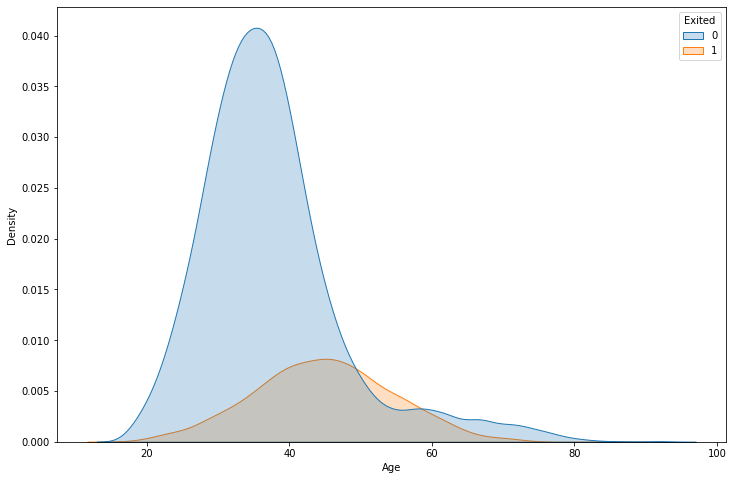

In [145]:
plt.figure(figsize=(12,8))
sns.kdeplot(data=df,x='Age',hue='Exited',fill=True)

Multivariate

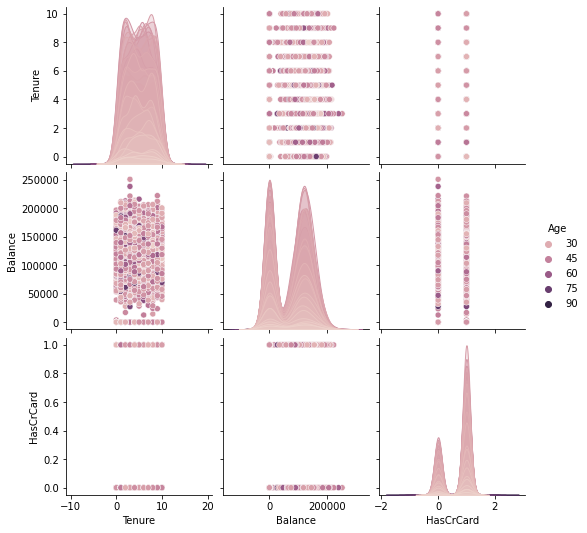

In [146]:
sns.pairplot(data=df[['Age','Tenure','Balance','HasCrCard']],hue='Age')

Discriptive Statistics

In [147]:
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [148]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber          5.000500e+03
CustomerId         1.569094e+07
CreditScore        6.505288e+02
Age                3.892180e+01
Tenure             5.012800e+00
Balance            7.648589e+04
NumOfProducts      1.530200e+00
HasCrCard          7.055000e-01
IsActiveMember     5.151000e-01
EstimatedSalary    1.000902e+05
Exited             2.037000e-01
dtype: float64

In [149]:
df.std()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


RowNumber           2886.895680
CustomerId         71936.186123
CreditScore           96.653299
Age                   10.487806
Tenure                 2.892174
Balance            62397.405202
NumOfProducts          0.581654
HasCrCard              0.455840
IsActiveMember         0.499797
EstimatedSalary    57510.492818
Exited                 0.402769
dtype: float64

In [150]:
df.max()

RowNumber              10000
CustomerId          15815690
Surname               Zuyeva
CreditScore              850
Geography              Spain
Gender                  Male
Age                       92
Tenure                    10
Balance            250898.09
NumOfProducts              4
HasCrCard                  1
IsActiveMember             1
EstimatedSalary    199992.48
Exited                     1
dtype: object

In [151]:
df.min()

RowNumber                 1
CustomerId         15565701
Surname               Abazu
CreditScore             350
Geography            France
Gender               Female
Age                      18
Tenure                    0
Balance                 0.0
NumOfProducts             1
HasCrCard                 0
IsActiveMember            0
EstimatedSalary       11.58
Exited                    0
dtype: object

# **Handling missing values**

In [152]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [153]:
data = pd.read_csv("/Churn_Modelling.csv")
bool_series = pd.isnull(data["Gender"])
data[bool_series]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


# **Outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


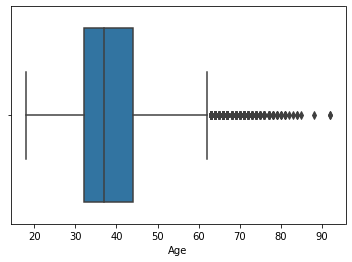

In [154]:
sns.boxplot(df['Age'],data=df)

In [186]:
value_threshold = float(df['Age'].max()+(df['Age'].std()*5000))
df['Age'] = np.where(df['Age']>value_threshold ,value_threshold ,df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


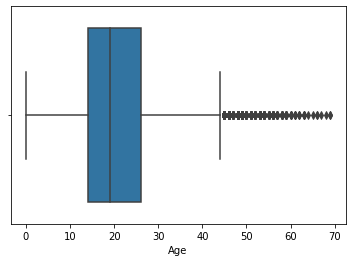

In [187]:
sns.boxplot(df['Age'],data=df)

# **Check for Categorical columns and perform encoding**

In [157]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  float64
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [158]:
cat = pd.Categorical(df['Geography'])
print(cat)

['France', 'Spain', 'France', 'France', 'Spain', ..., 'France', 'France', 'France', 'Germany', 'France']
Length: 10000
Categories (3, object): ['France', 'Germany', 'Spain']


In [159]:
le = LabelEncoder()

In [160]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [161]:
count(df['Geography'])

Counter({'France': 5014, 'Spain': 2477, 'Germany': 2509})

In [162]:
df['Age']=le.fit_transform(df['Age'])

In [163]:
count(df['Geography'])

Counter({'France': 5014, 'Spain': 2477, 'Germany': 2509})

In [164]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,24,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,23,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,24,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,21,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,25,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,21,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,17,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,18,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,24,3,75075.31,2,1,0,92888.52,1


In [165]:
df['Surname'].unique()

array(['Hargrave', 'Hill', 'Onio', ..., 'Kashiwagi', 'Aldridge',
       'Burbidge'], dtype=object)

In [166]:
count(df['Surname'])

Counter({'Hargrave': 1,
         'Hill': 17,
         'Onio': 8,
         'Boni': 14,
         'Mitchell': 20,
         'Chu': 22,
         'Bartlett': 4,
         'Obinna': 2,
         'He': 18,
         'H?': 19,
         'Bearce': 1,
         'Andrews': 6,
         'Kay': 5,
         'Chin': 16,
         'Scott': 29,
         'Goforth': 1,
         'Romeo': 1,
         'Henderson': 16,
         'Muldrow': 1,
         'Hao': 12,
         'McDonald': 19,
         'Dellucci': 13,
         'Gerasimov': 2,
         'Mosman': 1,
         'Yen': 14,
         'Maclean': 24,
         'Young': 20,
         'Nebechi': 6,
         'McWilliams': 2,
         'Lucciano': 11,
         'Azikiwe': 5,
         'Odinakachukwu': 4,
         'Sanderson': 4,
         'Maggard': 2,
         'Clements': 9,
         'Lombardo': 15,
         'Watson': 20,
         'Lorenzo': 12,
         'Armstrong': 1,
         'Cameron': 19,
         'Hsiao': 8,
         'Clarke': 4,
         'Osborne': 6,
         'Lavine'

In [167]:
df['Surname']=le.fit_transform(df['Surname'])

In [168]:
count(df['Surname'])

Counter({1115: 1,
         1177: 17,
         2040: 8,
         289: 14,
         1822: 20,
         537: 22,
         177: 4,
         2000: 2,
         1146: 18,
         1081: 19,
         195: 1,
         83: 6,
         1369: 5,
         515: 16,
         2389: 29,
         1021: 1,
         2307: 1,
         1154: 16,
         1872: 1,
         1108: 12,
         1736: 19,
         697: 13,
         991: 2,
         1862: 1,
         2880: 14,
         1642: 24,
         2897: 20,
         1908: 6,
         1772: 2,
         1609: 11,
         133: 5,
         2007: 4,
         2364: 4,
         1655: 2,
         567: 9,
         1587: 15,
         2775: 20,
         1594: 12,
         105: 1,
         396: 19,
         1231: 8,
         564: 4,
         2067: 6,
         1508: 1,
         241: 10,
         2668: 4,
         1689: 29,
         2016: 3,
         2888: 11,
         347: 14,
         477: 3,
         2645: 20,
         1983: 4,
         2115: 4,
         2895: 1,
  

In [169]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,France,Female,24,2,0.00,1,1,1,101348.88,1
1,2,15647311,1177,608,Spain,Female,23,1,83807.86,1,0,1,112542.58,0
2,3,15619304,2040,502,France,Female,24,8,159660.80,3,1,0,113931.57,1
3,4,15701354,289,699,France,Female,21,1,0.00,2,0,0,93826.63,0
4,5,15737888,1822,850,Spain,Female,25,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,1999,771,France,Male,21,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,1336,516,France,Male,17,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,1570,709,France,Female,18,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,2345,772,Germany,Male,24,3,75075.31,2,1,0,92888.52,1


# **Split**

In [170]:
x=df.iloc[:,0:3]
y=df['Age']

In [171]:
x

,RowNumber,CustomerId,Surname
0,1,15634602,1115
1,2,15647311,1177
2,3,15619304,2040
3,4,15701354,289
4,5,15737888,1822
...,...,...,...
9995,9996,15606229,1999
9996,9997,15569892,1336
9997,9998,15584532,1570
9998,9999,15682355,2345


In [172]:
y

0       24
1       23
2       24
3       21
4       25
        ..
9995    21
9996    17
9997    18
9998    24
9999    10
Name: Age, Length: 10000, dtype: int64

In [173]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=11)

In [174]:
xtrain

,RowNumber,CustomerId,Surname
1264,1265,15732199,993
5376,5377,15602500,1694
2037,2038,15678146,2845
6485,6486,15635197,1016
1600,1601,15748718,1037
...,...,...,...
1293,1294,15687752,1067
4023,4024,15629187,2611
7259,7260,15718921,1183
5200,5201,15641298,617


In [175]:
xtest

,RowNumber,CustomerId,Surname
3104,3105,15654230,1808
6353,6354,15676353,831
8689,8690,15684769,2808
5857,5858,15813659,909
6011,6012,15783007,2113
...,...,...,...
8125,8126,15666982,2496
8444,8445,15793641,839
2167,2168,15780846,2248
8043,8044,15616525,2485


In [176]:
st = StandardScaler()
nm = MinMaxScaler()

# **Training**

In [177]:
s_xtrain = st.fit_transform(xtrain)
s_xtrain

array([[-1.29671985,  0.57944472, -0.60566716],
       [ 0.12810842, -1.2259028 ,  0.22108595],
       [-1.02887154, -0.17294697,  1.57856501],
       ...,
       [ 0.7805772 ,  0.39462137, -0.38158287],
       [ 0.06712355, -0.68585335, -1.04911819],
       [-0.42664597,  0.25658151,  0.18098665]])

In [180]:
n_xtrain = nm.fit_transform(xtrain)
n_xtrain

array([[0.12642529, 0.66600394, 0.33879222],
       [0.53770754, 0.14715813, 0.57795974],
       [0.20374075, 0.44977118, 0.97065848],
       ...,
       [0.72604521, 0.61288684, 0.40361651],
       [0.52010402, 0.30236503, 0.21050836],
       [0.37757552, 0.57321503, 0.5663596 ]])

# **TESTING**

In [178]:
s_xtest = st.transform(xtest)

In [179]:
s_xtest

array([[-0.65915078, -0.50584615,  0.35553652],
       [ 0.46664373, -0.19790466, -0.79672851],
       [ 1.27607924, -0.080758  ,  1.53492754],
       ...,
       [-0.9838259 ,  1.2565875 ,  0.87446857],
       [ 1.05223706, -1.03068157,  1.15398424],
       [-0.03093735, -0.11942642,  1.47595799]])

In [181]:
n_xtest = nm.transform(xtest)
n_xtest

array([[0.31046209, 0.35409799, 0.61685432],
       [0.63542709, 0.44259849, 0.28352098],
       [0.86907381, 0.47626572, 0.9580348 ],
       ...,
       [0.21674335, 0.86061062, 0.76697373],
       [0.80446089, 0.20326351, 0.8478335 ],
       [0.49179836, 0.46515265, 0.94097578]])